# 빅데이터 분석 결과 시각화 문제해결 시나리오 결과물 제출 - 김정욱

## 1번.

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import read_excel
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
xlsx = read_excel('http://itpaper.co.kr/data/koweps2021_dataset.xlsx', engine = 'openpyxl')

df = xlsx
df.columns = ['성별', '태어난_년도', '교육수준', '가구형태', '혼인상태', '경제활동_참여상태',\
                         '직종', '통신비', '일년간_문제', '균등화_구분']

df['성별'] = df['성별'].astype('category')
df['교육수준'] = df['교육수준'].astype('category')
df['가구형태'] = df['가구형태'].astype('category')
df['혼인상태'] = df['혼인상태'].astype('category')
df['경제활동_참여상태'] = df['경제활동_참여상태'].astype('category')
df['직종'] = df['직종'].astype('category')
df['일년간_문제'] = df['일년간_문제'].astype('category')
df['균등화_구분'] = df['균등화_구분'].astype('category')

df

,성별,태어난_년도,교육수준,가구형태,혼인상태,경제활동_참여상태,직종,통신비,일년간_문제,균등화_구분
0,2,1936,2,1,2,9,NaN,5.0,0,2
1,2,1936,2,1,2,9,NaN,2.0,0,2
2,2,1936,2,1,2,9,NaN,3.0,4,2
3,2,1936,2,1,2,9,NaN,1.0,7,1
4,2,1936,2,1,2,9,NaN,1.0,7,2
...,...,...,...,...,...,...,...,...,...,...
98881,1,1967,5,5,1,9,874.0,114.0,4,1
98882,1,1967,5,5,1,9,874.0,105.0,0,1
98883,1,1967,5,5,1,9,874.0,120.0,0,1
98884,1,1967,5,5,1,9,874.0,115.0,0,1


In [3]:
df.dtypes

성별           category
태어난_년도          int64
교육수준         category
가구형태         category
혼인상태         category
경제활동_참여상태    category
직종           category
통신비           float64
일년간_문제       category
균등화_구분       category
dtype: object

In [4]:
num = df['태어난_년도'].describe()
print(num)
#2002년이 최대값, 20대이므로 10대 이하는 모두 0

count    98886.000000
mean      1953.143165
std         16.048789
min       1910.000000
25%       1940.000000
50%       1952.000000
75%       1966.000000
max       2002.000000
Name: 태어난_년도, dtype: float64


In [5]:
list_age = list(df['태어난_년도'])
age0_9 = []
age10_19 = []
age20_29 = []
age30_39 = []
age40_49 = []
age50_59 = []
age60_69 = []
age70_ = []

for i in list_age:
    if i > 1992 and i <= 2002 :
        age20_29.append(i)
    elif i > 1982 and i <= 1992:
        age30_39.append(i)
    elif i > 1972 and i <= 1982:
        age40_49.append(i)
    elif i > 1962 and i <= 1972:
        age50_59.append(i)
    elif i > 1952 and i <= 1962:
        age60_69.append(i)
    else:
        age70_.append(i)

ag = {
    '0~9': len(age0_9),
    '10~19': len(age10_19),
    '20~29': len(age20_29),
    '30~39': len(age30_39),
    '40~49': len(age40_49),
    '50~59': len(age50_59),
    '60~69': len(age60_69),
    '70~': [len(age70_)]
}

ages = DataFrame(ag).T
ages

,0
0~9,0
10~19,0
20~29,291
30~39,2249
40~49,11312
50~59,17290
60~69,17716
70~,50028


In [6]:
indf = list(ages.index)
x = list(range(0,len(indf)))
numf = list(ages[0])

In [7]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['axes.unicode_minus'] = False

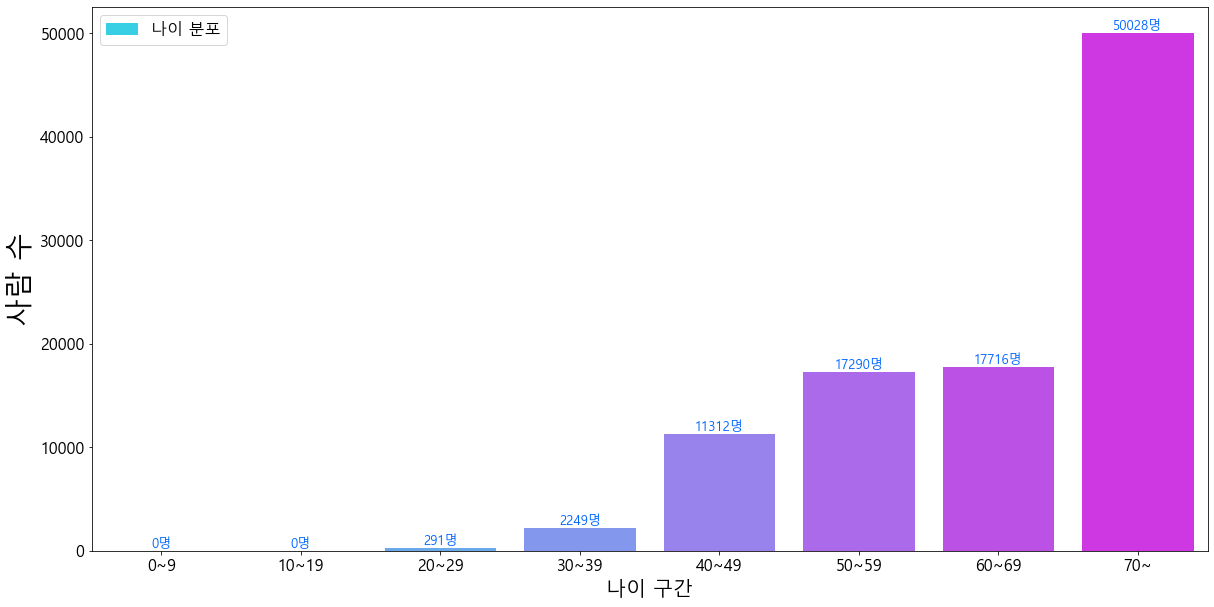

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))

sns.barplot(data = ages, x = ages.index, y = ages[0], label = '나이 분포', palette = 'cool', ax = ax)
ax.legend()
ax.set_xlabel('나이 구간', fontsize = 20)
ax.set_ylabel('사람 수', fontsize = 28)
for i, v in enumerate(numf):
    str_val = "%d명" % v
    ax.text(x[i], v, str_val, fontsize=13, color='#0066ff', 
           horizontalalignment='center', verticalalignment='bottom')

plt.show()
plt.close()

## 2번.

In [9]:
dfm = df[df['성별'] == 1]
dfm

,성별,태어난_년도,교육수준,가구형태,혼인상태,경제활동_참여상태,직종,통신비,일년간_문제,균등화_구분
23,1,1948,3,5,1,9,NaN,5.0,1,2
24,1,1948,3,5,1,9,513.0,5.0,4,2
25,1,1948,3,5,1,9,513.0,5.0,4,2
26,1,1948,3,5,1,9,521.0,5.0,1,1
27,1,1948,3,5,1,9,NaN,22.0,1,2
...,...,...,...,...,...,...,...,...,...,...
98881,1,1967,5,5,1,9,874.0,114.0,4,1
98882,1,1967,5,5,1,9,874.0,105.0,0,1
98883,1,1967,5,5,1,9,874.0,120.0,0,1
98884,1,1967,5,5,1,9,874.0,115.0,0,1


In [10]:
list_agem = list(dfm['태어난_년도'])
age0_9m = []
age10_19m = []
age20_29m = []
age30_39m = []
age40_49m = []
age50_59m = []
age60_69m = []
age70_m = []

for i in list_agem:
    if i > 1992 and i <= 2002 :
        age20_29m.append(i)
    elif i > 1982 and i <= 1992:
        age30_39m.append(i)
    elif i > 1972 and i <= 1982:
        age40_49m.append(i)
    elif i > 1962 and i <= 1972:
        age50_59m.append(i)
    elif i > 1952 and i <= 1962:
        age60_69m.append(i)
    else:
        age70_m.append(i)

agm = {
    '0~9': len(age0_9m),
    '10~19': len(age10_19m),
    '20~29': len(age20_29m),
    '30~39': len(age30_39m),
    '40~49': len(age40_49m),
    '50~59': len(age50_59m),
    '60~69': len(age60_69m),
    '70~': [len(age70_m)]
}

agesm = DataFrame(agm).T
agesm

,0
0~9,0
10~19,0
20~29,93
30~39,1467
40~49,10108
50~59,14943
60~69,13572
70~,29058


In [11]:
dff = df[df['성별'] == 2]
dff

,성별,태어난_년도,교육수준,가구형태,혼인상태,경제활동_참여상태,직종,통신비,일년간_문제,균등화_구분
0,2,1936,2,1,2,9,NaN,5.0,0,2
1,2,1936,2,1,2,9,NaN,2.0,0,2
2,2,1936,2,1,2,9,NaN,3.0,4,2
3,2,1936,2,1,2,9,NaN,1.0,7,1
4,2,1936,2,1,2,9,NaN,1.0,7,2
...,...,...,...,...,...,...,...,...,...,...
98857,2,1934,3,1,2,9,NaN,1.0,0,1
98858,2,1934,3,1,2,9,NaN,2.0,4,1
98859,2,1934,3,1,2,9,NaN,3.0,0,1
98860,2,1934,3,1,2,9,NaN,2.0,99,1


In [12]:
list_agef = list(dff['태어난_년도'])
age0_9f = []
age10_19f = []
age20_29f = []
age30_39f = []
age40_49f = []
age50_59f = []
age60_69f = []
age70_f = []

for i in list_agef:
    if i > 1992 and i <= 2002 :
        age20_29f.append(i)
    elif i > 1982 and i <= 1992:
        age30_39f.append(i)
    elif i > 1972 and i <= 1982:
        age40_49f.append(i)
    elif i > 1962 and i <= 1972:
        age50_59f.append(i)
    elif i > 1952 and i <= 1962:
        age60_69f.append(i)
    else:
        age70_f.append(i)

agf = {
    '0~9': len(age0_9f),
    '10~19': len(age10_19f),
    '20~29': len(age20_29f),
    '30~39': len(age30_39f),
    '40~49': len(age40_49f),
    '50~59': len(age50_59f),
    '60~69': len(age60_69f),
    '70~': [len(age70_f)]
}

agesf = DataFrame(agf).T
agesf

,0
0~9,0
10~19,0
20~29,198
30~39,782
40~49,1204
50~59,2347
60~69,4144
70~,20970


In [13]:
dfmf = pd.concat([agesm, agesf], axis = 1)
dfmf.columns = ['남자', '여자']
dfmf

,남자,여자
0~9,0,0
10~19,0,0
20~29,93,198
30~39,1467,782
40~49,10108,1204
50~59,14943,2347
60~69,13572,4144
70~,29058,20970


In [14]:
subject = list(dfmf.index)
subj = []
for i in subject:
    subj.append(i)
    subj.append(i)

In [15]:
sex = ['남자', '여자','남자', '여자','남자', '여자','남자', '여자',\
         '남자', '여자','남자', '여자','남자', '여자','남자', '여자']
nump = [0,0,0,0, 98, 198, 1467,782, 10108, 1204, 14943, 2347, 13572, 4144, 29058, 20970]

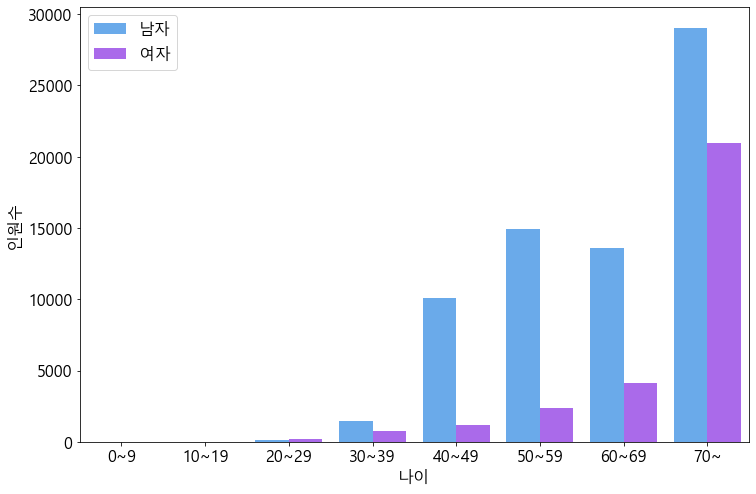

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

sns.barplot(x = subj, hue = sex, y = nump, palette = "cool", ax=ax)

ax.legend()
ax.set_ylabel('인원수')
ax.set_xlabel('나이')

plt.show()
plt.close()

## 3번.

In [17]:
#교육수준별 일반가구/저소득층 가구 분포
df11 = df[df['균등화_구분'] == 1] #일반
df22 = df[df['균등화_구분'] == 2] #저소득

In [18]:
condition = df.교육수준 == 1
df[condition]
# 2002년생부터 존재하므로 교육수준 1(미취학(만7세미만))은 제외

,성별,태어난_년도,교육수준,가구형태,혼인상태,경제활동_참여상태,직종,통신비,일년간_문제,균등화_구분


In [19]:
df11num = []
for i in range(2, 10):
    condition1 = (df.균등화_구분 == 1) & (df.교육수준 == i)
    df11num.append(len(df[condition1]))
print(df11num)

[2985, 9758, 8077, 21845, 5567, 13386, 2217, 307]


In [20]:
df22num = []
for i in range(2, 10):
    condition2 = (df.균등화_구분 == 2) & (df.교육수준 == i)
    df22num.append(len(df[condition2]))
print(df22num)

[8462, 12768, 4958, 5985, 799, 1604, 167, 1]


In [21]:
summ = {
    '교육수준' : ['무학','초등학교','중학교','고등학교','전문대','대학교','석사','박사'],
    '일반' : df11num,
    '저소득' : df22num
}
df3 = DataFrame(summ)
df33 = df3.set_index('교육수준')
df33

,일반,저소득
교육수준,,
무학,2985,8462
초등학교,9758,12768
중학교,8077,4958
고등학교,21845,5985
전문대,5567,799
대학교,13386,1604
석사,2217,167
박사,307,1


In [22]:
x = np.arange(len(df11num))
print(x)
print(list(df33.index))

[0 1 2 3 4 5 6 7]
['무학', '초등학교', '중학교', '고등학교', '전문대', '대학교', '석사', '박사']


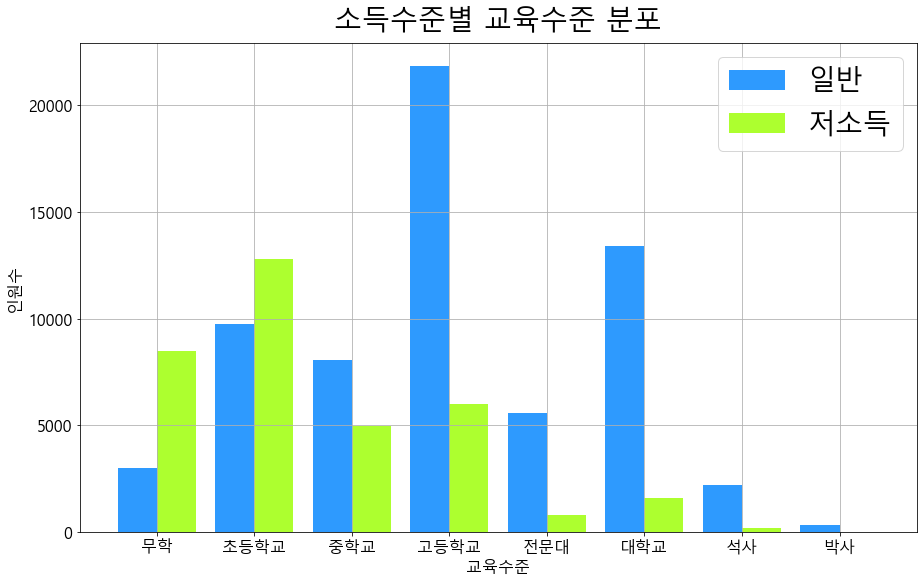

In [23]:
fig, ax = plt.subplots(1, 1, figsize = (15,9))

ax.bar(x-0.2, df11num, label='일반', width=0.4, color='#2E9AFE')
ax.bar(x+0.2, df22num, label='저소득', width=0.4, color='#ADFF2F')

ax.set_xticks(x)
ax.set_xticklabels(list(df33.index))

ax.legend(fontsize=28)
ax.grid()
ax.set_xlabel('교육수준', fontsize=16)
ax.set_ylabel('인원수', fontsize=16)
ax.set_title('소득수준별 교육수준 분포', fontsize=28, pad=14)

plt.show()
plt.close()

## 4번.

In [24]:
#가정의 소득 수준에 근심의 차이
df111num = []
for i in range(0, 12):
    condition11 = (df.균등화_구분 == 1) & (df.일년간_문제 == i)
    df111num.append(len(df[condition11]))
print(df111num)

[27083, 9954, 2268, 2484, 14338, 264, 33, 893, 45, 779, 859, 902]


In [25]:
condition111 = (df.균등화_구분 == 1) & (df.일년간_문제 == 99)
print(len(df[condition111])) #무응답 제외

4240


In [26]:
df222num = []
for i in range(0, 12):
    condition22 = (df.균등화_구분 == 2) & (df.일년간_문제 == i)
    df222num.append(len(df[condition22]))
print(df222num)

[8065, 9048, 967, 370, 13128, 136, 16, 306, 53, 269, 312, 238]


In [27]:
condition222 = (df.균등화_구분 == 2) & (df.일년간_문제 == 99)
print(len(df[condition222])) #무응답 제외

1836


In [28]:
sum4 = {
    '일년간_문제' : ['없음','경제적 어려움','가구원의 취업 및 실업','자녀교육 혹은 행동',\
                '가구원의 건강','가구원의 알코올','가족 내 폭력','가구원간 관계','가구원의 가출',\
               '주거관련 문제', '기타', '자녀의 결혼문제'],
    '일반' : df111num,
    '저소득' : df222num
}
df4 = DataFrame(sum4)
df44 = df4.set_index('일년간_문제')
df44

,일반,저소득
일년간_문제,,
없음,27083,8065
경제적 어려움,9954,9048
가구원의 취업 및 실업,2268,967
자녀교육 혹은 행동,2484,370
가구원의 건강,14338,13128
가구원의 알코올,264,136
가족 내 폭력,33,16
가구원간 관계,893,306
가구원의 가출,45,53


In [35]:
x1 = x2 = np.arange(len(df111num))

print(list(df44.index))

['없음', '경제적 어려움', '가구원의 취업 및 실업', '자녀교육 혹은 행동', '가구원의 건강', '가구원의 알코올', '가족 내 폭력', '가구원간 관계', '가구원의 가출', '주거관련 문제', '기타', '자녀의 결혼문제']


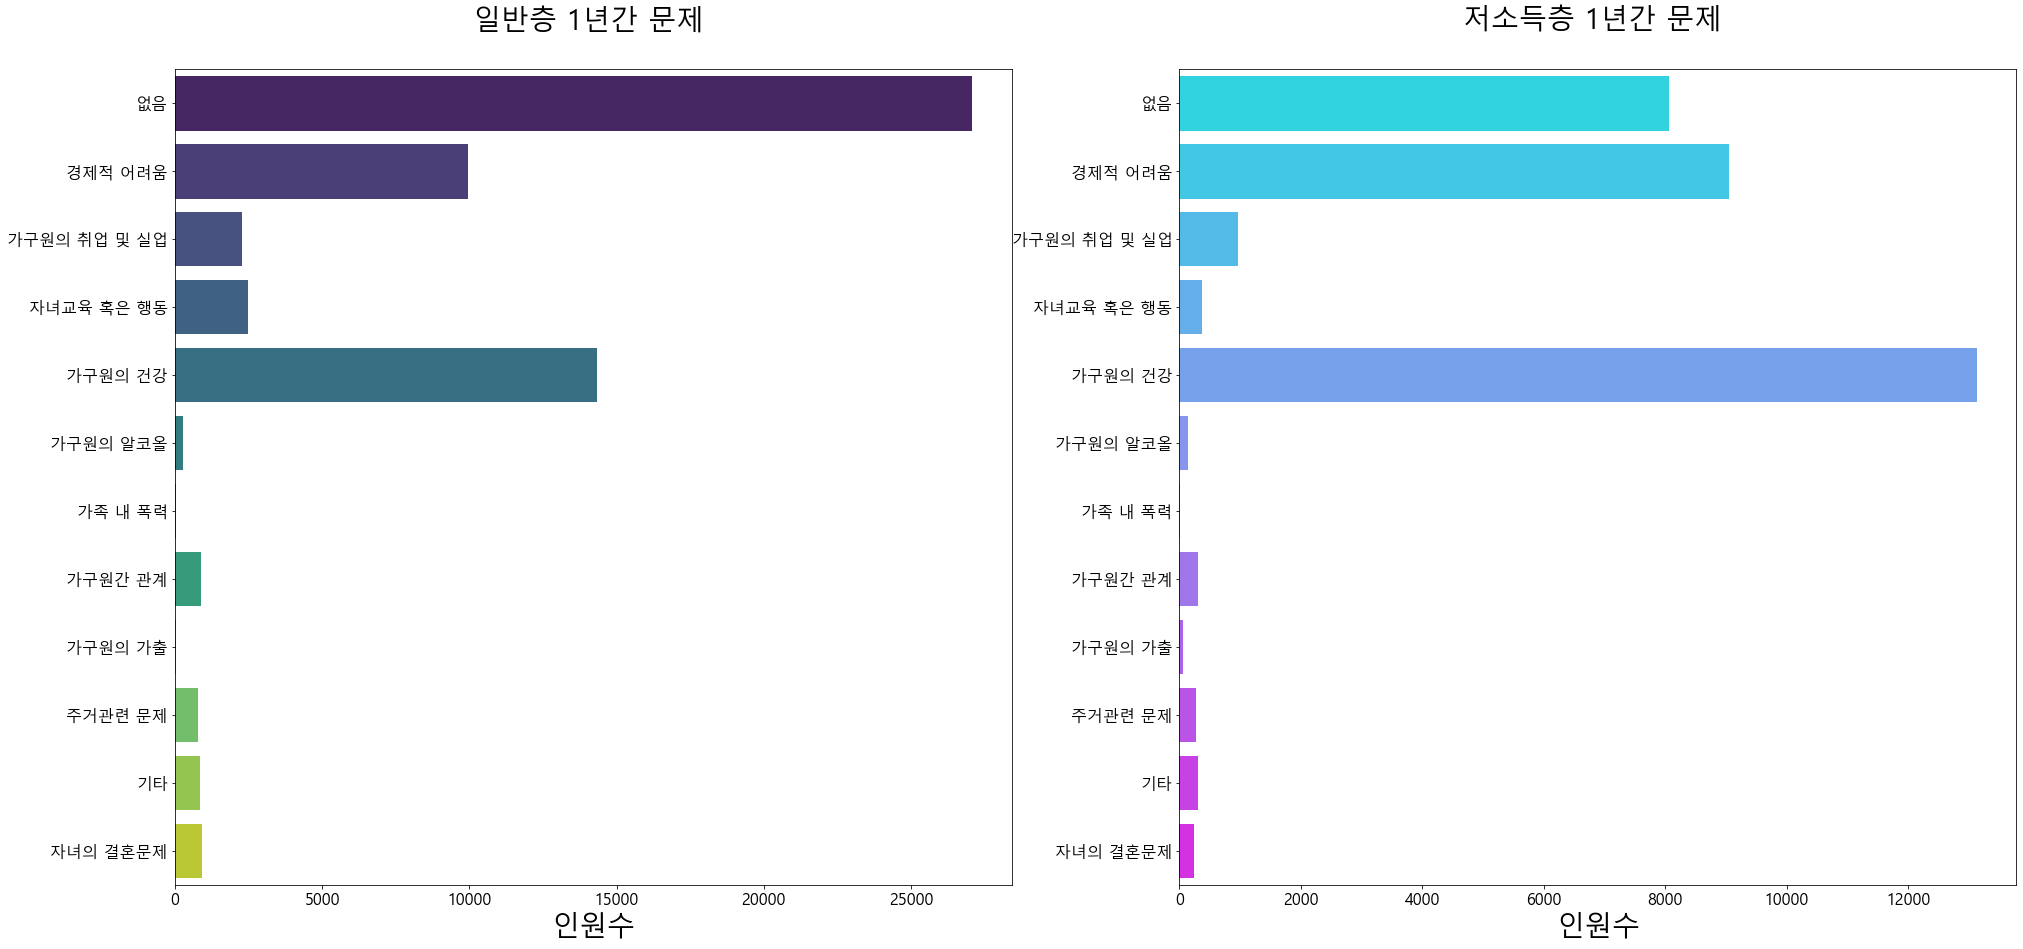

In [36]:
fig, ax = plt.subplots(1,2, figsize = (33,15))

sns.barplot(x = df111num, y = list(df44.index), palette = 'viridis', ax = ax[0])
sns.barplot(x = df222num, y = list(df44.index), palette = 'cool', ax = ax[1])

ax[0].set_xlabel('인원수', fontsize = 28)
ax[0].set_title('일반층 1년간 문제 \n', fontsize = 28)
ax[1].set_xlabel('인원수', fontsize = 28)
ax[1].set_title('저소득층 1년간 문제 \n', fontsize = 28)
plt.show()
plt.close()

## 5번.

In [37]:
prob = ['없음','경제적','취업/실업','자녀',\
        '건강','술','가정폭력','가족관계','가출',\
        '주거', '기타', '자녀결혼']

df51num = []
for i in range(0, 12):
    condition51 = (df.태어난_년도 > 1992) & (df.일년간_문제 == i)
    df51num.append(len(df[condition51]))
#print(df51num)

sum51 = {
    '고민' : prob,
    '인원수' : df51num
}
df5a = DataFrame(sum51)
df51 = df5a.set_index('고민')
df51

,인원수
고민,
없음,121
경제적,24
취업/실업,28
자녀,3
건강,6
술,0
가정폭력,0
가족관계,2
가출,0


In [38]:
df52num = []
for i in range(0, 12):
    condition52 = (df.태어난_년도 > 1962) & (df.태어난_년도 <= 1992) & (df.일년간_문제 == i)
    df52num.append(len(df[condition52]))
#print(df52num)

sum52 = {
    '고민' : prob,
    '인원수' : df52num
}
df5b = DataFrame(sum52)
df52 = df5b.set_index('고민')
df52

,인원수
고민,
없음,14160
경제적,6230
취업/실업,1153
자녀,2008
건강,3527
술,108
가정폭력,16
가족관계,489
가출,24


In [39]:
df53num = []
for i in range(0, 12):
    condition53 = (df.태어난_년도 <= 1962) & (df.일년간_문제 == i)
    df53num.append(len(df[condition53]))
#print(df53num)

sum53 = {
    '고민' : prob,
    '인원수' : df53num
}
df5c = DataFrame(sum53)
df53 = df5c.set_index('고민')
df53

,인원수
고민,
없음,20867
경제적,12748
취업/실업,2054
자녀,843
건강,23933
술,292
가정폭력,33
가족관계,708
가출,74


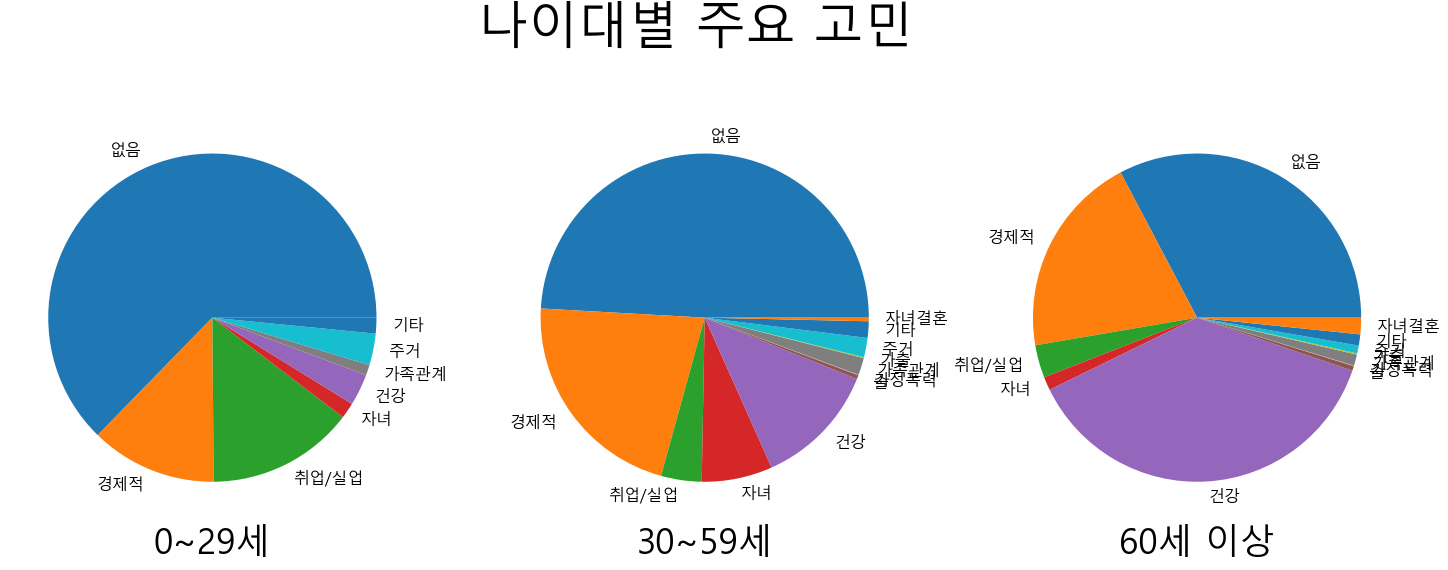

In [40]:
fig, ax = plt.subplots(1,3, figsize = (25,15))

df51['인원수'].plot.pie(ax=ax[0])
df52['인원수'].plot.pie(ax=ax[1])
df53['인원수'].plot.pie(ax=ax[2])

ax[1].set_title("나이대별 주요 고민 \n", fontsize=50)
ax[0].set_xlabel("0~29세", fontsize = 35)
ax[1].set_xlabel("30~59세", fontsize = 35)
ax[2].set_xlabel("60세 이상", fontsize = 35)

ax[0].set_ylabel(None)
ax[1].set_ylabel(None)
ax[2].set_ylabel(None)


plt.show()
plt.close()